In [1]:
print('Hello, world!')

Hello, world!


In [2]:
!pip install tensorflow

In [3]:
!pip install keras

In [4]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape

2025-04-15 16:47:26.271332: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 16:47:26.273917: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 16:47:26.281108: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744724846.293946    7150 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744724846.297788    7150 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744724846.307163    7150 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

(60000, 28, 28)

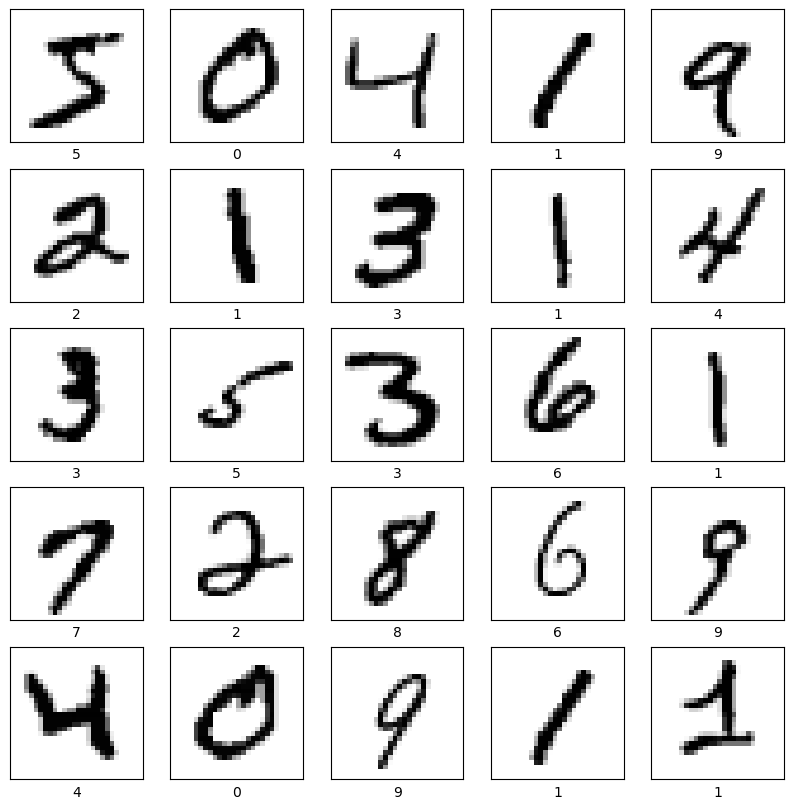

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [6]:
train_images = train_images.reshape((60000, 28 * 28)).astype('float') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float') / 255

In [7]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
from keras import models, layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
network.fit(train_images, train_labels, epochs=10, batch_size=128)


/home/rabiann/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1744724852.180802    7150 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1744724852.184475    7150 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8713 - loss: 0.4158
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9713 - loss: 0.0914
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9839 - loss: 0.0533
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9889 - loss: 0.0338
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9917 - loss: 0.0261
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9937 - loss: 0.0202
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9955 - loss: 0.0150
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9969 - loss: 0.0099
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9973 - loss: 0.0082
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9981 - loss: 0.0057


In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9771 - loss: 0.1125   


In [10]:
print(test_loss, test_acc)

0.09034386277198792 0.9811999797821045


In [11]:
network.save('my_mnist_model.h5')

In [12]:
from keras.models import load_model
model = load_model('my_mnist_model.h5')

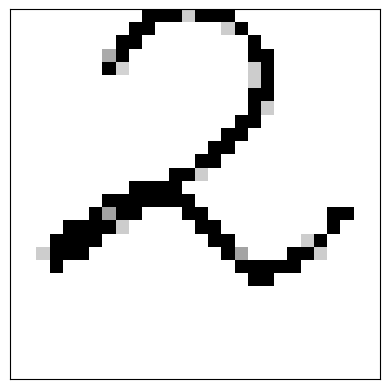

In [13]:
import cv2
tst = 255 - cv2.imread('./test5.png', 0)
tst = cv2.resize(tst, (28, 28))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(tst, cmap=plt.cm.binary)
plt.show()
tst = tst.reshape((1, 28 * 28))
tst = tst.astype('float32') / 255

In [14]:
tst

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 1.        , 0.19607843, 1.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.19607843,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [15]:
pred = list(network.predict(tst)[0])
print(pred.index(max(pred)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2


In [47]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [17]:
labels = '''airplane 										
automobile 										
bird 										
cat 										
deer 										
dog 										
frog 										
horse 										
ship 										
truck'''.split()
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [48]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

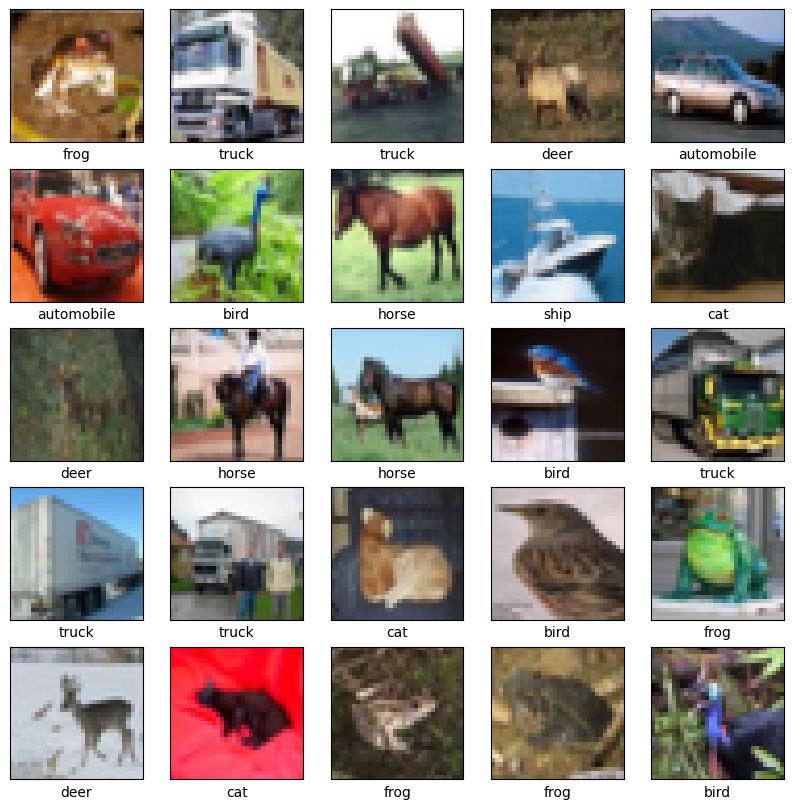

In [19]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(x_train[i])
    plt.xlabel(labels[y_train[i][0]])
plt.show()

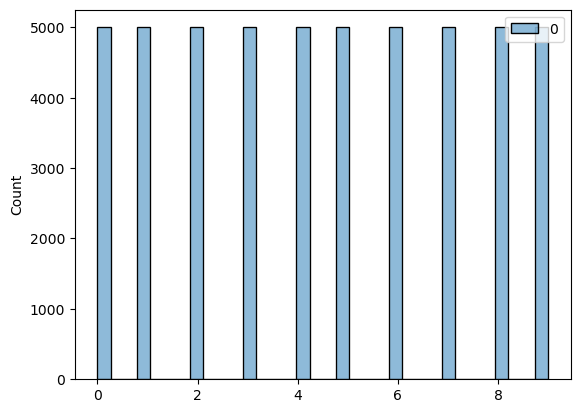

<Axes: ylabel='Count'>

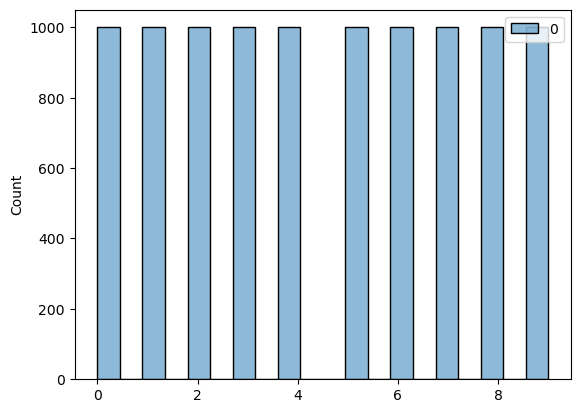

In [148]:
import seaborn as sns
sns.histplot(y_train)
plt.show()
sns.histplot(y_test)

In [111]:
from keras.models import *
from keras.layers import *
from keras.callbacks import *
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


model = Sequential()
model.add(Conv2D(filters=32, activation='relu', kernel_size=3, input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, activation='relu', kernel_size=3))
model.add(Conv2D(filters=64, activation='relu', kernel_size=3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10))

early_stopping = EarlyStopping(patience=3)

model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


/home/rabiann/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.3050 - loss: 1.8836 - val_accuracy: 0.5273 - val_loss: 1.3035
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5116 - loss: 1.3608 - val_accuracy: 0.6019 - val_loss: 1.1352
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5674 - loss: 1.2116 - val_accuracy: 0.6357 - val_loss: 1.0501
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6112 - loss: 1.0886 - val_accuracy: 0.6538 - val_loss: 0.9900
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6437 - loss: 1.0046 - val_accuracy: 0.6702 - val_loss: 0.9325
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6633 - loss: 0.9413 - val_accuracy: 0.6852 - val_loss: 0.8924
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6808 - loss: 0.8896 - val_accuracy: 0.6932 - val_loss: 0.8772
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.7002 - loss: 0.8348 - 

In [152]:
test_loss, test_prec = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7054 - loss: 0.8960


In [129]:
def to_idxs(y):
    class_probs = [max(a) for a in y]
    kk = [y[i].index(class_probs[i]) for i in range(len(class_probs))]
    return kk

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


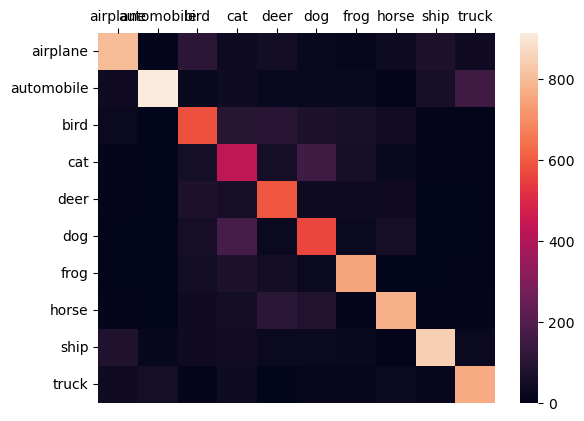

In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
y_true = model.predict(x_test).tolist()
k = to_idxs(y_true)
cm = confusion_matrix(k, y_test)
df = pd.DataFrame(data=cm, index=labels, columns=labels)
ax = sns.heatmap(df)
ax.xaxis.tick_top()

In [150]:
import cv2
def load_image(path, to_rgb=False): 
    tst = cv2.imread(path, 1)
    if to_rgb:
        tst = cv2.cvtColor(tst, cv2.COLOR_BGR2RGB)
    tst = cv2.resize(tst, (32, 32))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tst)
    plt.show()
    return tst

In [156]:
def get_label(img):
    pred = model.predict(test.reshape((1, 32, 32, 3))).tolist()[0]
    return labels[pred.index(max(pred))]

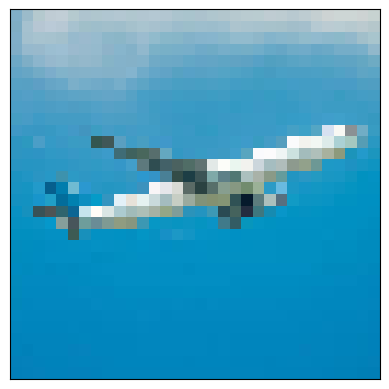

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


'airplane'

In [157]:
test = load_image('./plane.jpeg', True)
get_label(test)

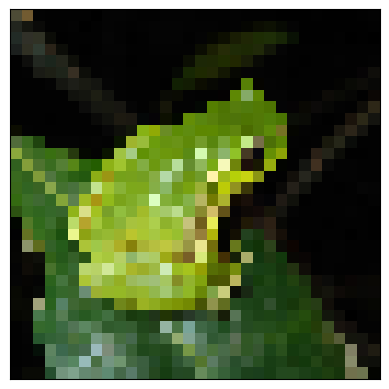

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'frog'

In [159]:
test = load_image('./frog.jpg', True)
get_label(test)

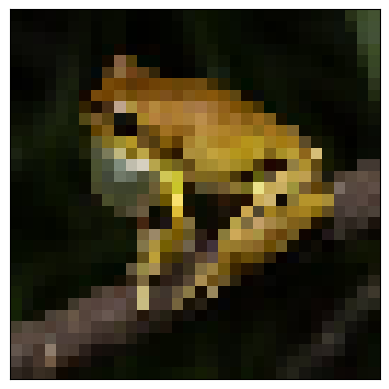

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


'automobile'

In [160]:
test = load_image('./frog2.jpeg', True)
get_label(test)

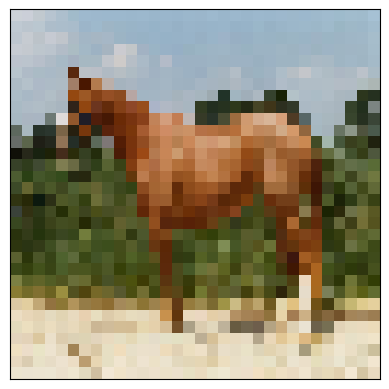

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'horse'

In [163]:
test = load_image('./Roan.jpg', True)
get_label(test)

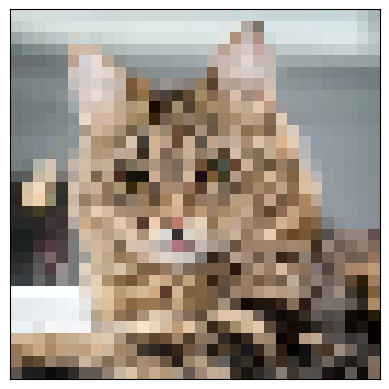

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


'ship'

In [164]:
test = load_image('./cat.jpeg', True)
get_label(test)

In [165]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [166]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [221]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle-Boot'''.split()
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle-Boot']

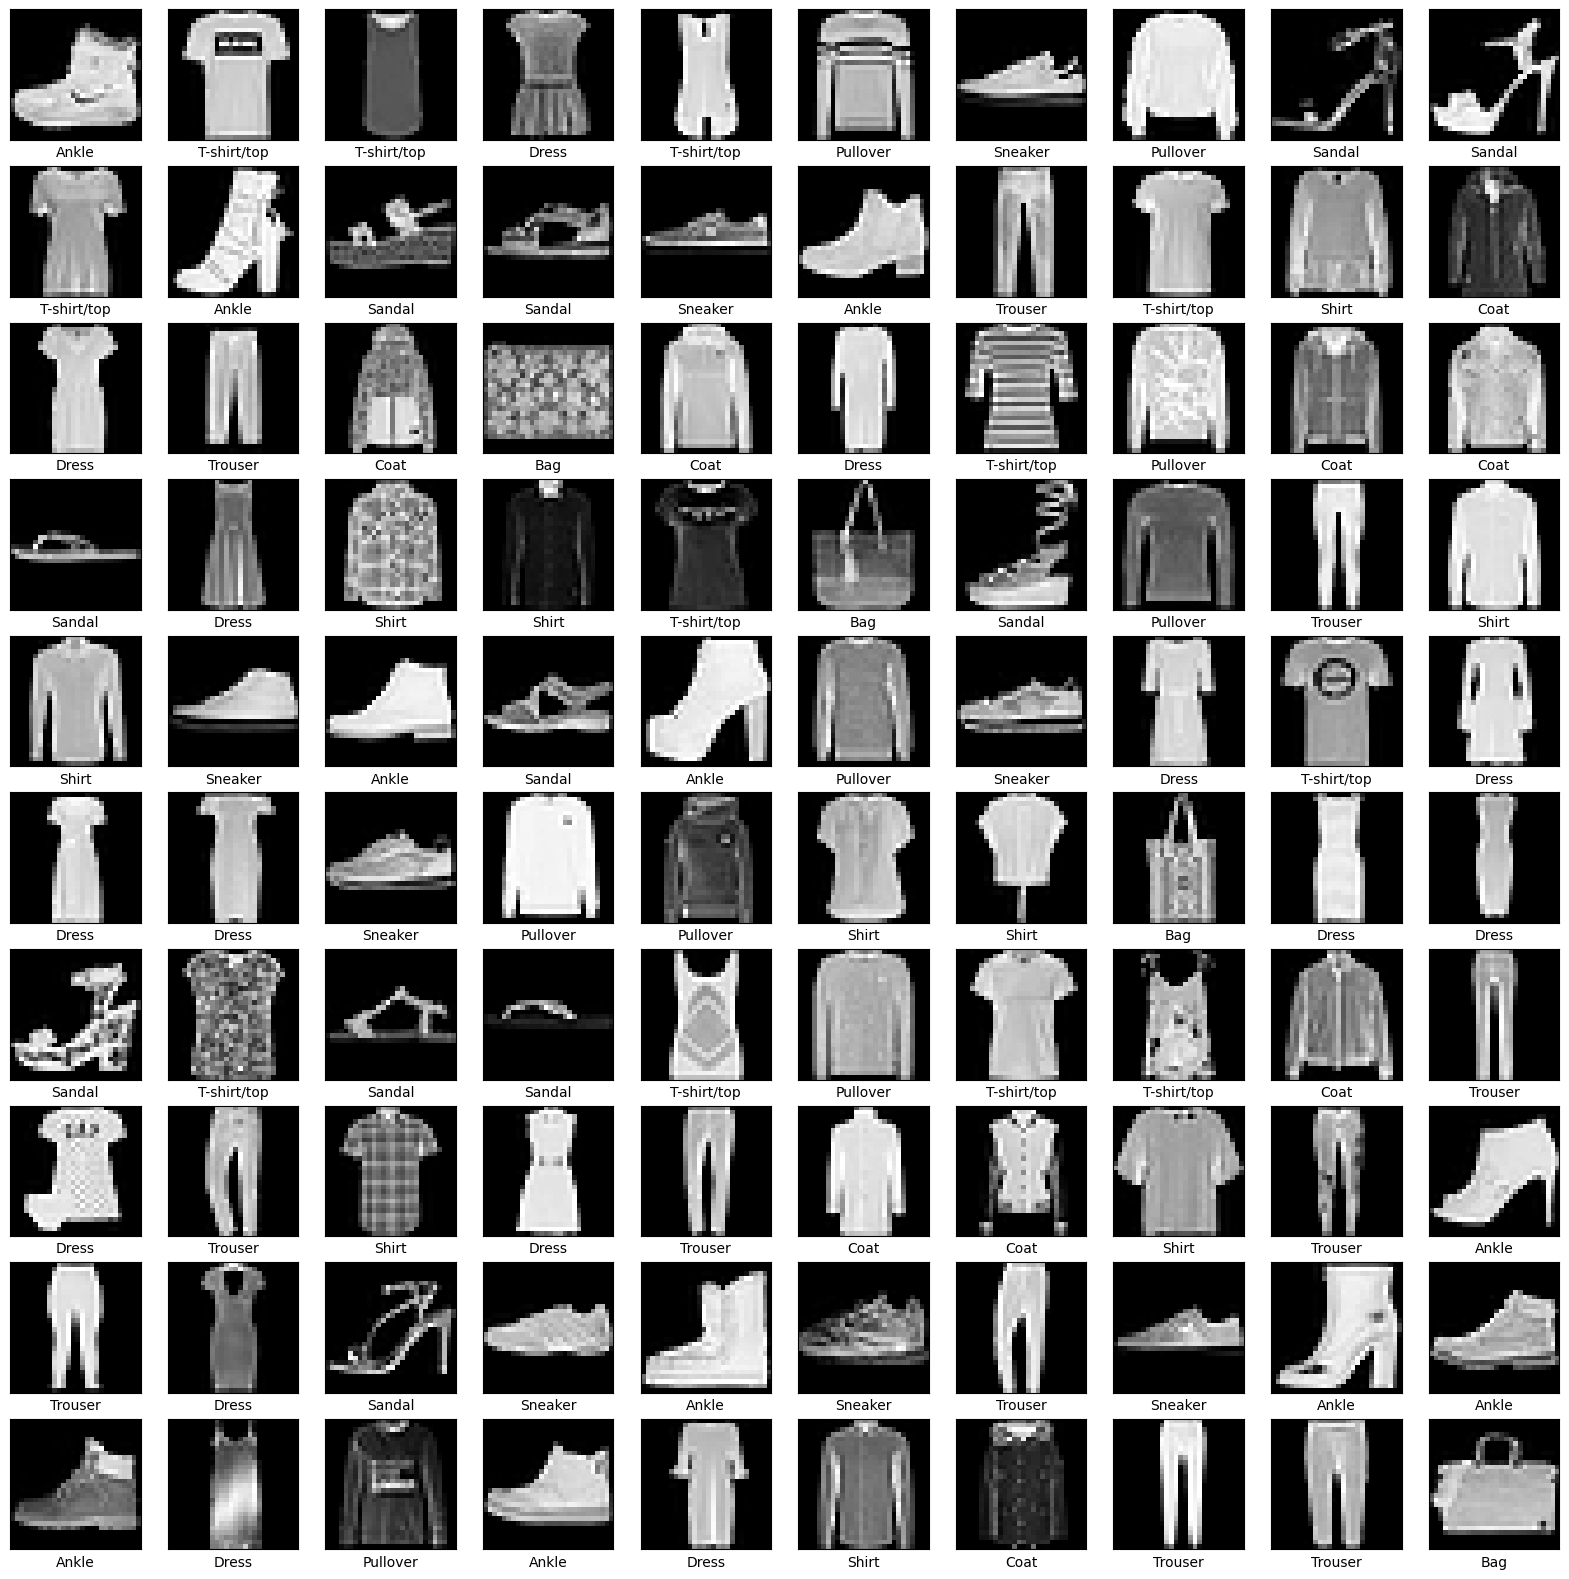

In [193]:
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(x_train[i], cmap='grey')
    plt.xlabel(labels[y_train[i]])
plt.show()

In [198]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

model = Sequential()
model.add(Conv1D(filters=32, activation='relu', kernel_size=3, input_shape=(28, 28)))
model.add(MaxPooling1D(pool_size=(2,)))
model.add(Conv1D(filters=64, activation='relu', kernel_size=3))
model.add(MaxPooling1D(pool_size=(2,)))
model.add(Conv1D(filters=64, activation='relu', kernel_size=3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10))

early_stopping = EarlyStopping(patience=3)

model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Epoch 1/25


/home/rabiann/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6667 - loss: 0.9339 - val_accuracy: 0.8212 - val_loss: 0.4744
Epoch 2/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8332 - loss: 0.4672 - val_accuracy: 0.8450 - val_loss: 0.4143
Epoch 3/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8594 - loss: 0.3992 - val_accuracy: 0.8598 - val_loss: 0.3900
Epoch 4/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8692 - loss: 0.3666 - val_accuracy: 0.8659 - val_loss: 0.3749
Epoch 5/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8742 - loss: 0.3476 - val_accuracy: 0.8694 - val_loss: 0.3585
Epoch 6/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8794 - loss: 0.3284 - val_accuracy: 0.8718 - val_loss: 0.3610
Epoch 7/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8874 - loss: 0.3119 - val_accuracy: 0.8763 - val_loss: 0.3462
Epoch 8/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8905 - loss: 0.2991 - val_accuracy: 0.8771 - val_

In [199]:
test_loss, test_prec = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8806 - loss: 0.3396  


In [203]:
def to_idxs(y):
    class_probs = [max(a) for a in y]
    kk = [y[i].index(class_probs[i]) for i in range(len(class_probs))]
    return kk

In [202]:
def get_label(img):
    pred = model.predict(test.reshape((1, 28, 28))).tolist()[0]
    return labels[pred.index(max(pred))]

In [212]:
def load_image(path): 
    tst = cv2.flip(255 - cv2.imread(path, 1), 1)
    tst = cv2.cvtColor(tst, cv2.COLOR_BGR2GRAY)
    tst = cv2.resize(tst, (28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tst, cmap='gray')
    plt.show()
    return tst

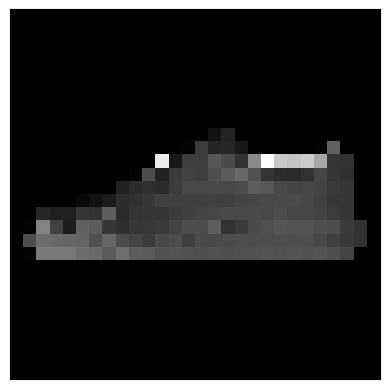

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


'Sandal'

In [214]:
test = load_image('sneaker.jpg')
get_label(test)

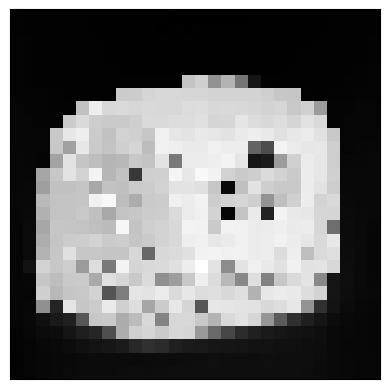

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'Bag'

In [215]:
test = load_image('bag.jpg')
get_label(test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step


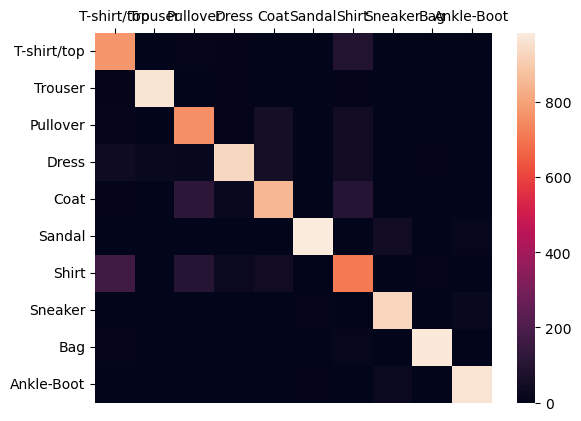

In [223]:
y_true = model.predict(x_test).tolist()
k = to_idxs(y_true)
cm = confusion_matrix(k, y_test)
df = pd.DataFrame(data=cm, index=labels, columns=labels)
ax = sns.heatmap(df)
ax.xaxis.tick_top()